In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
# 데이터 읽기
raw_data = pd.read_csv('linear_regression_data.csv', encoding='utf-8', engine='python')
raw_data.head()

tall  weight  label
0  152.6    44.7   11.5
1  160.4    39.9   15.8
2  112.2    21.1    6.6
3  159.3    46.4   15.6
4  150.9    46.6   11.0

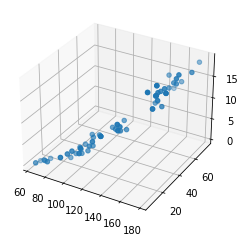

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

tall = raw_data['tall'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['label'].to_numpy()
ax.scatter(tall,weight,age)
plt.show()

In [4]:
# split raw data into X and label
X = raw_data[['tall', 'weight']].to_numpy()
X = np.c_[X, np.ones(80)]
y = raw_data['label'].to_numpy()
y = y.reshape(80,1)
print('X :',X)
print('y:', y)

X : [[152.6  44.7   1. ]
 [160.4  39.9   1. ]
 [112.2  21.1   1. ]
 [159.3  46.4   1. ]
 [150.9  46.6   1. ]
 [ 91.7  13.1   1. ]
 [ 74.8   8.    1. ]
 [111.1  16.1   1. ]
 [162.9  43.8   1. ]
 [131.3  27.6   1. ]
 [105.3  19.2   1. ]
 [177.8  61.7   1. ]
 [101.8  16.8   1. ]
 [151.5  49.    1. ]
 [ 86.2  11.    1. ]
 [137.8  23.7   1. ]
 [160.1  40.6   1. ]
 [119.9  21.2   1. ]
 [156.4  65.9   1. ]
 [154.7  48.1   1. ]
 [ 64.4   5.5   1. ]
 [ 67.5   7.7   1. ]
 [ 70.7   8.6   1. ]
 [162.1  49.4   1. ]
 [167.3  55.6   1. ]
 [155.   35.8   1. ]
 [ 70.7   8.6   1. ]
 [ 74.8   8.    1. ]
 [130.5  26.5   1. ]
 [ 91.7  13.1   1. ]
 [108.6  23.4   1. ]
 [160.1  40.6   1. ]
 [ 94.7  15.1   1. ]
 [ 95.3  13.2   1. ]
 [162.7  46.9   1. ]
 [131.6  35.1   1. ]
 [154.7  61.4   1. ]
 [ 64.4   5.5   1. ]
 [159.6  71.5   1. ]
 [115.6  24.2   1. ]
 [ 72.2   8.3   1. ]
 [124.6  29.4   1. ]
 [134.5  27.8   1. ]
 [171.3  53.6   1. ]
 [162.1  49.4   1. ]
 [155.   35.8   1. ]
 [ 76.7   9.7   1. ]
 [159.6  

In [5]:
analytic_W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(analytic_W)

[[  0.16248137]
 [  0.01980255]
 [-12.27584624]]


GD

In [6]:
def numerucal_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]
        # f(x+h)
        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)

        # f(x-h)
        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)    

        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad

In [7]:
GD_W = np.zeros((3,1))
GD_W[0] = np.random.uniform(low=-10.0, high=10.0)
GD_W[1] = np.random.uniform(low=-10.0, high=10.0)
GD_W[2] = np.random.uniform(low=-10.0, high=10.0)
print(GD_W)

def fucntion_MSE(W,X,y):
    mse = np.zeros(len(X))
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse)/len(X)
    return mse

print(numerucal_gradient(fucntion_MSE, GD_W, X, y))
print(numerucal_gradient(fucntion_MSE, analytic_W, X, y))

[[-8.94551385]
 [ 0.63540529]
 [ 9.99096392]]
[[-149364.01400715]
 [ -38900.69420449]
 [  -1109.86762797]]
[[8.50395425e-01]
 [6.40876688e-02]
 [5.00000008e-05]]


In [8]:
# 1차 GD
num_epoch=20000
eta = 0.00001

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')


epoch:0 ========================> W:[-7.45187371  1.02441223 10.0020626 ], mse:1311755.686625918
epoch:10 ========================> W:[-1.62691459  2.52323729 10.04562295], mse:24469.28077260221
epoch:20 ========================> W:[-0.83666375  2.70097783 10.05192132], mse:1134.392670570222
epoch:30 ========================> W:[-0.72408988  2.70120061 10.05319907], mse:695.6904531039766
epoch:40 ========================> W:[-0.70279521  2.67781075 10.05379551], mse:672.2554776488714
epoch:50 ========================> W:[-0.69385776  2.65151852 10.05429471], mse:656.7265862660627
epoch:60 ========================> W:[-0.68665486  2.62510798 10.05477535], mse:641.6971068802161
epoch:70 ========================> W:[-0.67975599  2.59895062 10.05524808], mse:627.0219954900533
epoch:80 ========================> W:[-0.67296781  2.57309329 10.05571439], mse:612.6902040562643
epoch:90 ========================> W:[-0.66626346  2.54753915 10.05617456], mse:598.6936058233651
epoch:100 ===========

In [9]:
# 2차 GD
num_epoch=5000
eta = 0.0005

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')

epoch:0 ========================> W:[-0.10201584  0.39953905  9.99247641], mse:13.940171746910732
epoch:10 ========================> W:[-0.10197744  0.39949543  9.98980628], mse:13.937272199254334
epoch:20 ========================> W:[8036.12543685 2109.63280065   69.4538196 ], mse:19185977438.186047
epoch:30 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.198496181272195e+28
epoch:40 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:50 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:60 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:70 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:80 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:90 =======================

In [10]:
# 3차 GD
num_epoch=5000
eta = 0.0001

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')

epoch:0 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:10 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:20 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:30 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:40 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:50 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:60 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:70 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
epoch:80 ========================> W:[9.93805013e+12 1.06896895e+13 5.17592921e+09], mse:2.768135682375081e+30
ep

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [29]:
model = keras.Sequential([
    layers.Dense(10,activation='relu', input_shape=[32,3]),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae','mse'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32, 10)            40        
_________________________________________________________________
dense_7 (Dense)              (None, 32, 1)             11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
995  4.082025  1.560118  4.082025  2.150627  1.262478  2.150627    995
996  3.609562  1.481249  3.609562  2.025889  1.189843  2.025889    996
997  3.474165  1.412515  3.474165  2.021361  1.188677  2.021361    997
998  3.454718  1.421004  3.454718  2.013057  1.185966  2.013057    998
999  3.587345  1.399807  3.587345  2.149458  1.261125  2.149458    999

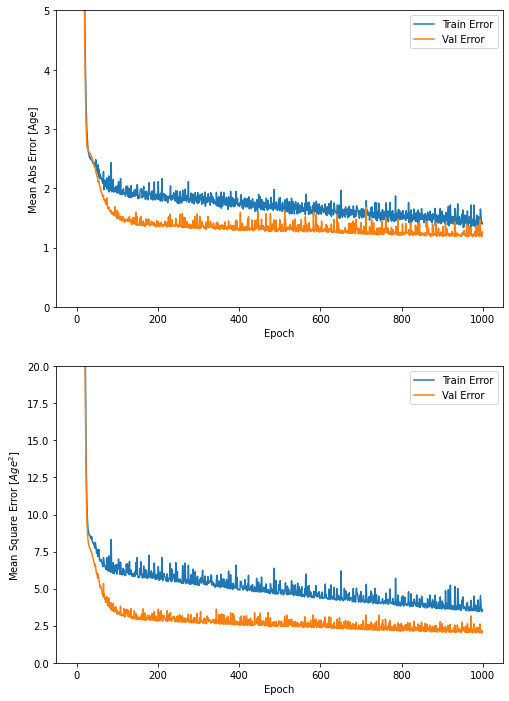

In [34]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Age]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Age^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

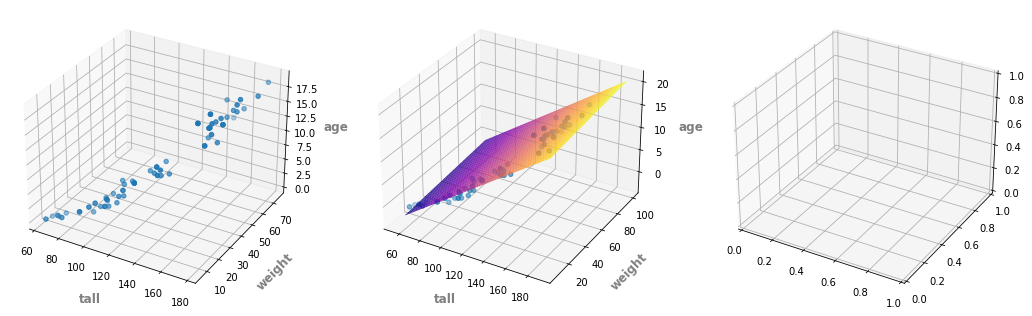

MovieWriter ffmpeg unavailable; using Pillow instead.


In [66]:
from matplotlib import animation
fig, axs = plt.subplots(1, 3, figsize=(18,10), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

# X, Y
tall_data = np.linspace(55,190,1000)
weight_data = np.linspace(10,100,1000)
Tall, Weight = np.meshgrid(tall_data, weight_data)


def init():
    # raw data
    axs[0].scatter(tall,weight,age)
    axs[0].set_xlabel('tall', fontdict=fontlabel, labelpad=10)
    axs[0].set_ylabel('weight', fontdict=fontlabel, labelpad=10)
    axs[0].set_zlabel('age', fontdict=fontlabel, labelpad=10)
    
    # optimal sol - analytic
    test = Tall*analytic_W[0]+Weight*analytic_W[1]+analytic_W[2]
    axs[1].scatter(tall,weight,age)
    axs[1].plot_surface(Tall, Weight, test, cmap='plasma')
    axs[1].set_xlabel('tall', fontdict=fontlabel, labelpad=10)
    axs[1].set_ylabel('weight', fontdict=fontlabel, labelpad=10)
    axs[1].set_zlabel('age', fontdict=fontlabel, labelpad=10)

    return fig,

def animate(i):
    axs[0].view_init(elev=30., azim=i)
    axs[1].view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# Show
plt.show()

# Save
anim.save('mpl3d_scatter.gif', fps=30)

# optimal sol - GD
